# Introdução

Para esse primeiro projeto, os dados foram selecionados do website "https://www.gapminder.org/data/".

Variáveis analisadas:
 - IDH - Índice de Desenvolvimento Humano.
 - Número de usuários de internet.
 - Porcentagem da população trabalhando com mais de 65 anos.
 
Ano estudado: 2000

Pergunta: Muitas vezes o Índice de Desenvolvimento Humano é diretamente proporcional ao desenvolvimento tecnológico de um país. Porém, algo que não temos certeza é: será que o número de usuários de internet também tem essa mesma relação com o IDH de um país? Além disso, na maioria dos casos, quanto maior o IDH, maior será a expectativa de vida em um país. Todavia, não sabemos como a taxa de idosos considerados PEA(População Economicamente Ativa) se comporta em relação ao IDH. Será que nos países com maior IDH e expectativa de vida, teremos uma maior porcentagem da população trabalhando com mais de 65 anos, como fator de uma aposentadoria mais tardia? Outra pergunta a ser formulada é: como a população trabalhadora idosa, pode ter uma relação de causalidade direta com o número de usuários de internet em um país? 

# Análise Exploratória dos Dados

In [56]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



In [57]:
dadoshdi = pd.read_excel('hdi_human_development_index.xlsx')
dadosinternet = pd.read_excel('internet_users.xlsx')
dadoslaborforce = pd.read_excel('aged_65_labour_fource_participation_rate.xlsx')

In [58]:
#deixando apenas os dados do ano de 2000
hdi_2000 = dadoshdi.loc[:, ["geo", 2000]]
#alterando o nome da coluna dos países
hdi_2000 = hdi_2000.rename(columns={'geo': 'Country'})
#rodando a tabela
hdi_2000 = hdi_2000.sort_values(by=2000).head(1000)
#removendo países sem dados inseridos
hdi_2000.dropna()

,Country,2000
121,Niger,0.255
27,Burundi,0.268
56,Ethiopia,0.283
104,Mali,0.297
114,Mozambique,0.298
33,Chad,0.300
145,Sierra Leone,0.302
32,Central African Republic,0.314
68,Guinea,0.322
38,"Congo, Dem. Rep.",0.331


In [59]:
internet_2000 = dadosinternet.loc[:, ["geo", 2000]]
internet_2000 = internet_2000.rename(columns={'geo': 'Country'})
internet_2000 = internet_2000.sort_values(by=2000).head(1000)
internet_2000.dropna()

,Country,2000
126,North Korea,0.0000
38,"Congo, Dem. Rep.",0.0059
56,Ethiopia,0.0153
94,Liberia,0.0177
155,Somalia,0.0200
164,Sudan,0.0258
39,"Congo, Rep.",0.0263
33,Chad,0.0357
124,Niger,0.0363
28,Cambodia,0.0470


In [60]:
laborforce_2000 = dadoslaborforce.loc[:, ["geo", 2000]]
laborforce_2000 = laborforce_2000.rename(columns={'geo': 'Country'})
laborforce_2000 = laborforce_2000.sort_values(by=2000).head(1000)
laborforce_2000.dropna()

,Country,2000
137,Slovak Republic,1.1
23,Bulgaria,1.2
56,France,1.3
143,Spain,1.6
92,Luxembourg,1.6
14,Belgium,1.6
60,Germany,2.6
69,Hungary,2.6
44,Denmark,2.6
7,Austria,2.6


In [61]:
dadoshdi_idx = hdi_2000.set_index('Country')
dadosinternet_idx = internet_2000.set_index('Country')
dadoslaborforce_idx = laborforce_2000.set_index('Country')

In [62]:
#Tabela A -> juntando HDI e Internet Access
jA = dadoshdi_idx.join(dadosinternet_idx, how='inner', lsuffix='_HDI', rsuffix='_Internet')
jA.head(1000)

,2000_HDI,2000_Internet
Country,,
Niger,0.255,0.0363
Burundi,0.268,0.0772
Ethiopia,0.283,0.0153
Mali,0.297,0.1430
Mozambique,0.298,0.1100
Chad,0.300,0.0357
Sierra Leone,0.302,0.1180
Central African Republic,0.314,0.0534
Guinea,0.322,0.0954


In [63]:
#Tabela B -> juntando HDI e Labor Force (+65)
jB = dadoshdi_idx.join(dadoslaborforce_idx, how='inner', lsuffix='_HDI', rsuffix='_LaborForce+65')
jB.head(1000)

,2000_HDI,2000_LaborForce+65
Country,,
Niger,0.255,54.6
Burundi,0.268,78.4
Ethiopia,0.283,46.8
Mali,0.297,23.8
Mozambique,0.298,79.3
Chad,0.300,68.9
Sierra Leone,0.302,37.8
Central African Republic,0.314,72.6
Guinea,0.322,50.7


In [64]:
#Tabela C -> juntando Internet Access e Labor Force (+65)
jC = dadosinternet_idx.join(dadoslaborforce_idx, how='inner', lsuffix='_Internet', rsuffix='_LaborForce+65')
jC.head(1000)

,2000_Internet,2000_LaborForce+65
Country,,
North Korea,0.0000,29.1
"Congo, Dem. Rep.",0.0059,46.5
Ethiopia,0.0153,46.8
Liberia,0.0177,49.9
Somalia,0.0200,46.3
Sudan,0.0258,39.0
"Congo, Rep.",0.0263,62.4
Chad,0.0357,68.9
Niger,0.0363,54.6


In [65]:
#Juntando Labor Force +65 com a Tabela A
total = jA.join(dadoslaborforce_idx, how="inner",rsuffix='_laborforce')
total.head(1000)
total.rename(columns={2000:"2000_LaborForce+65"})

,2000_HDI,2000_Internet,2000_LaborForce+65
Country,,,
Niger,0.255,0.0363,54.6
Burundi,0.268,0.0772,78.4
Ethiopia,0.283,0.0153,46.8
Mali,0.297,0.1430,23.8
Mozambique,0.298,0.1100,79.3
Chad,0.300,0.0357,68.9
Sierra Leone,0.302,0.1180,37.8
Central African Republic,0.314,0.0534,72.6
Guinea,0.322,0.0954,50.7


Os 10 países com piores IDHs, em conjunto com as outras duas variáveis(Internet Access e POrcentagem da população
trabalhando com mais de 65 anos).

In [66]:
total[0:11]
total.rename(columns={2000:"2000_LaborForce+65"})

,2000_HDI,2000_Internet,2000_LaborForce+65
Country,,,
Niger,0.255,0.0363,54.6
Burundi,0.268,0.0772,78.4
Ethiopia,0.283,0.0153,46.8
Mali,0.297,0.1430,23.8
Mozambique,0.298,0.1100,79.3
Chad,0.300,0.0357,68.9
Sierra Leone,0.302,0.1180,37.8
Central African Republic,0.314,0.0534,72.6
Guinea,0.322,0.0954,50.7


Os 10 países com melhores IDHs, em conjunto com as outras duas variáveis(Internet Access e POrcentagem da população
trabalhando com mais de 65 anos).

In [67]:
total[150:161]
total.rename(columns={2000:"2000_LaborForce+65"})

,2000_HDI,2000_Internet,2000_LaborForce+65
Country,,,
Niger,0.255,0.0363,54.6
Burundi,0.268,0.0772,78.4
Ethiopia,0.283,0.0153,46.8
Mali,0.297,0.1430,23.8
Mozambique,0.298,0.1100,79.3
Chad,0.300,0.0357,68.9
Sierra Leone,0.302,0.1180,37.8
Central African Republic,0.314,0.0534,72.6
Guinea,0.322,0.0954,50.7


Gráficos Conclusivos:

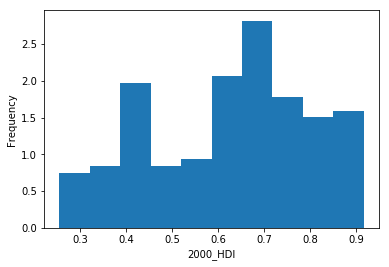

In [68]:
plot = total["2000_HDI"].plot.hist(density=True)
plot.set_xlabel('2000_HDI');

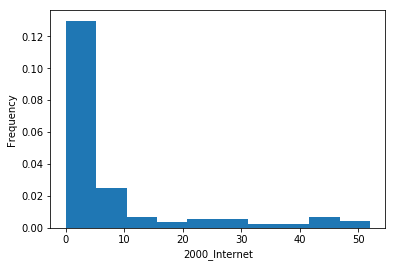

In [69]:
plot = total["2000_Internet"].plot.hist(density=True)
plot.set_xlabel('2000_Internet');

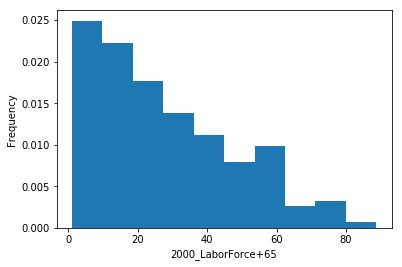

In [72]:
plot = total[2000].plot.hist(density=True)
plot.set_xlabel("2000_LaborForce+65");

In [ ]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

Ajuste linear entre X3 e X4:
Coeficiente linear: -25.845294457914953
Coeficiente angular: 53.49566042573101


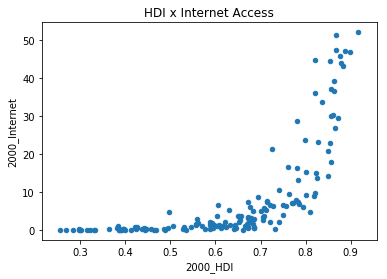

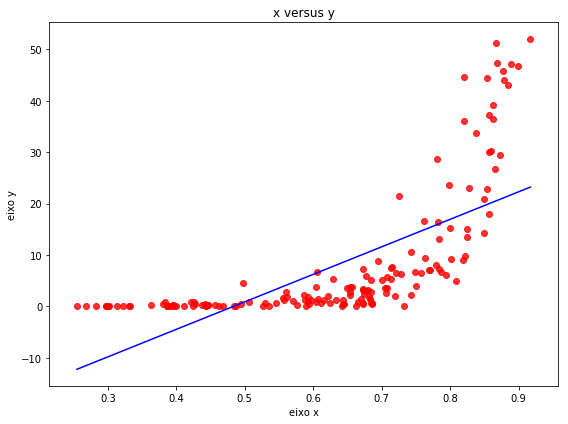

In [73]:
jA.plot.scatter(x='2000_HDI',y='2000_Internet');
plt.title("HDI x Internet Access")
reta(jA['2000_HDI'], jA['2000_Internet'])

Ajuste linear entre X3 e X4:
Coeficiente linear: 84.9744288317804
Coeficiente angular: -91.94628701471082


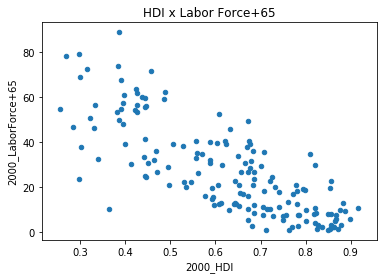

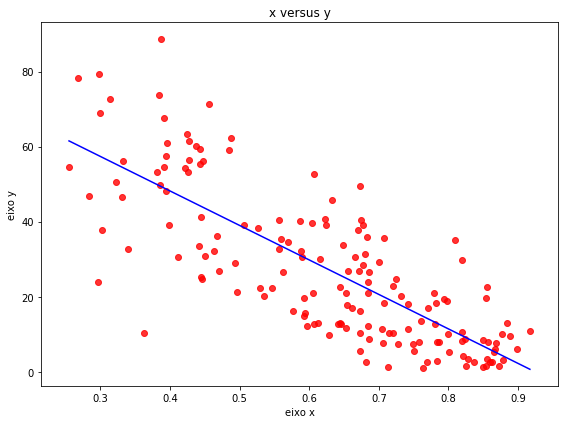

In [74]:
jB.plot.scatter(x='2000_HDI',y='2000_LaborForce+65');
plt.title("HDI x Labor Force+65")
reta(jB['2000_HDI'], jB['2000_LaborForce+65'])

Ajuste linear entre X3 e X4:
Coeficiente linear: 33.28890010783401
Coeficiente angular: -0.7398644903344063


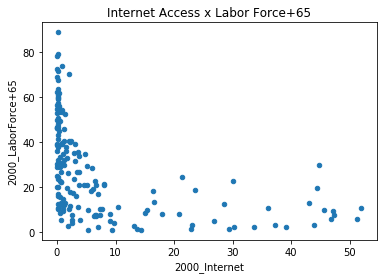

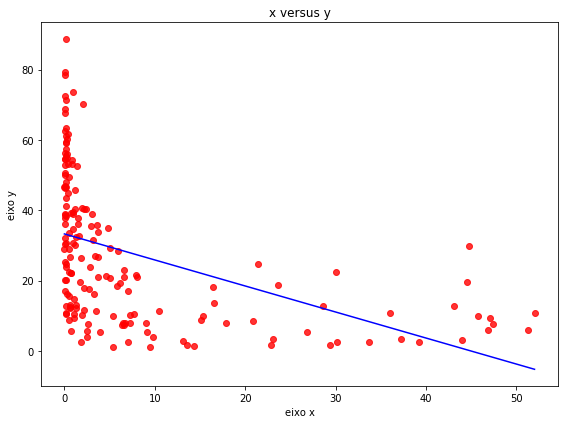

In [75]:
jC.plot.scatter(x='2000_Internet',y='2000_LaborForce+65');
plt.title("Internet Access x Labor Force+65")
reta(jC["2000_Internet"], jC["2000_LaborForce+65"])

In [76]:
total.corr()

,2000_HDI,2000_Internet,2000
2000_HDI,1.000000,0.685915,-0.781613
2000_Internet,0.685915,1.000000,-0.460699
2000,-0.781613,-0.460699,1.000000


# Conclusão 

Diante dos dados obtidos, e das análises realizadas, temos agora respostas para as perguntas realizadas na introdução do projeto. Para responder a primeira pergunta, devemos olhar para os histogramas. No histograma do IDH vemos uma forte concentração de países com IDH entre 0.6 e 0.9, sendo o mínimo IDH obtido no ano de 2000 foi de aproximadamente 0.15. Até então, esses dados não nos diziam muita coisa. Todavia, ao olharmos para o histograma referente ao acesso da população à internet, pode-se observar uma altíssima concentração de países com somente 10% da população com esse acesso. Isso nos diz que mesmo alguns países com altos IDHs, na época, não tinham um acesso muito bom à internet, fato provocado pelo fraco avanço tecnológico da época. Isso também é comprovado pelo fato de que o país com maior porcentagem de usuários que usufruem da internet, apresentar um acesso de 52%. Porém algo que podemos constatar pelo gráfico HDI x Internet Access, é que: quanto maior o IDH, maior será o acesso a internet de um país. Isso pode ser provado por uma Correlação Positiva entre as duas variáveis, e um Coeficiente de Correlação de 0.68. Isso significa que quanto maior fica o IDH de uma país, maior será o percentual da populaçao com acesso à internet.

Para respondermos a segunda pergunta devemos, primeiramente, direcionar nossa análise para o histograma da População Trabalhadora com mais de 65 anos. No histograma, podemos ver uma assimetria para direita, indicando que quanto menor o IDH, maior será a porcentagem de idosos que ainda trabalham. Diante do resultado obtido, devemos analisar o gráfico HDI x LaborForce+65. Está claro que tratamos de uma Correlação Negativa, a medida que enquanto o percentual de idosos trabalhando com mais de 65 anos aumenta, o Indice de Desenvolvimento dos paises diminui. Tal fator fica claro, a medida que é apresentado um Coeficiente de Correlação de -0.78, algo que prova uma relação inversamente proporcional entre as duas variáveis. Isso prova o contrário do afirmado na introdução, na qual: paises com maior idh, levam à uma aposentadoria mais tardia, visto que possuem melhores condiçoes medicas e salários de forma a instigar a classe trabalhadora a trabalhar ate a terceira idade. Porém não é isso que os dados nos mostram. Diante do gráfico e do histograma, podemos ver que quanto maior o IDH, menor a porcentagem de idosos trabalhando. Isso pode ocorrer por diversos motivos, levando a novas investigações de dados como: acesso a educação, porcentagem de homens e mulheres idosos trabalhando, média e mediana de salários e valores de patrimônios da população variando de país para país.

Por fim, para respondermos a última pergunta, devemos direcionar nosso olhar para o último gráfico (Internet Access x LaborForce+65). Nele percebos um coeficiente de correlação de -0.46. Isso nos diz que, por ser negativo, enquanto a porcentagem da população com acesso a internet aumenta, a porcentagem da população idosa que ainda trabalha diminui. Porém, por apresentar um coeficiente de apenas 0.46, os dados variam e muitas vezes a afirmação pode estar longe da realidade. Isso pode ser visto no fato de que nos países localizados entre o intervalo de 10% de acesso à internet, temos países com 80% da população idosa ainda trabalhadora e outros com apenas 10% da população idosa ainda trabalhadora. Isso nos mostra que para países com uma população que tem pouco acesso à internet, a população trabalhadora idosa pode variar aproximadamente entre 85% e 5%, enquanto que para países com elevado acesso à internet, para a época mais de 15%, apresentam apenas uma população trabalhadora idosa, menor que 20%.